In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [2]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# Preprocess the data
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
import time

start_time=time.time()

# Train the model
model.fit(train_images, train_labels, epochs=15, batch_size=64, validation_split=0.2)

train_time=time.time()-start_time

print("Training time: ", train_time)

Epoch 1/15


750/750 [==============================] - 16s 18ms/step - loss: 0.5908 - accuracy: 0.7832 - val_loss: 0.4195 - val_accuracy: 0.8471
Epoch 2/15
750/750 [==============================] - 13s 17ms/step - loss: 0.3743 - accuracy: 0.8647 - val_loss: 0.3478 - val_accuracy: 0.8724
Epoch 3/15
750/750 [==============================] - 13s 17ms/step - loss: 0.3227 - accuracy: 0.8827 - val_loss: 0.3055 - val_accuracy: 0.8892
Epoch 4/15
750/750 [==============================] - 13s 17ms/step - loss: 0.2876 - accuracy: 0.8956 - val_loss: 0.2964 - val_accuracy: 0.8931
Epoch 5/15
750/750 [==============================] - 12s 17ms/step - loss: 0.2610 - accuracy: 0.9043 - val_loss: 0.2895 - val_accuracy: 0.8955
Epoch 6/15
750/750 [==============================] - 13s 17ms/step - loss: 0.2402 - accuracy: 0.9127 - val_loss: 0.2706 - val_accuracy: 0.9045
Epoch 7/15
750/750 [==============================] - 13s 17ms/step - loss: 0.2210 - accuracy: 0.9186 - val_loss: 0.2625 - val_accurac

In [7]:
loss, acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.2950 - accuracy: 0.9101


1/1 [==============================] - 0s 303ms/step


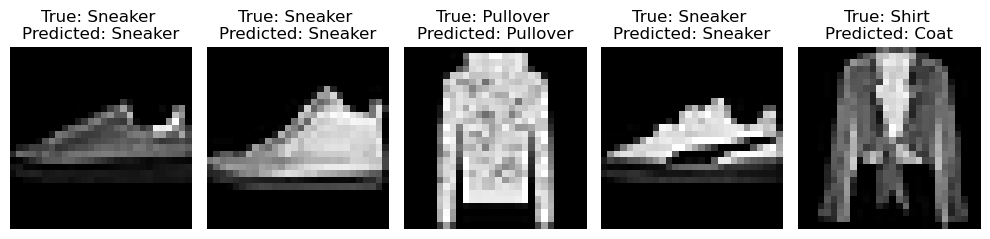

In [8]:
# Select random images from the test set
num_samples = 5
random_indices = np.random.choice(len(test_images), num_samples, replace=False)
sample_images = test_images[random_indices]
sample_labels = test_labels[random_indices]

# Make predictions on the sample images
predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

# Define class labels
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Show images with their predicted and true labels
plt.figure(figsize=(10, 6))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {class_labels[np.argmax(sample_labels[i])]} \nPredicted: {class_labels[predicted_labels[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [9]:
model.save("model.h5")

C:\Users\HP\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
# for checkin the online images 
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import cv2

def preprocess_image(image_path):
    
  """
  Preprocesses a fashion image with black background and white foreground.

  Args:
      image_path: Path to the image file.

  Returns:
      A NumPy array representing the preprocessed image.
  """
  # Read the image
  image = cv2.imread(image_path)
  # Convert BGR (OpenCV default) to RGB (Matplotlib default)
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.title("Original Image")
  # Display the image
  plt.imshow(image_rgb)
  # plt.axis('off')  # Turn off axis labels
  plt.show()


  # Load the image from the file path in grayscale mode
  img = load_img(image_path, grayscale=True, target_size=(28, 28))
  # Convert the image to a NumPy array
  img_array = img_to_array(img)
  # Invert the grayscale values (black -> white, white -> black)
  img_array = 255 - img_array
  # Show grayscale image
  plt.title("Preprocessed Grayscale Image")
  plt.imshow(img_array, cmap='gray')
  # Reshape the image array to add a dimension for the color channel (even though it's grayscale)
  img_array = img_array.reshape((1, 28, 28, 1))

  # Normalize the pixel values to be between 0 and 1
  return img_array / 255.0

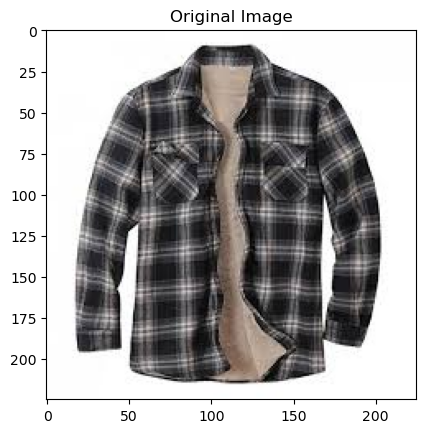

1/1 [==============================] - ETA: 0s

C:\Users\HP\anaconda3\lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
predicted_label Shirt


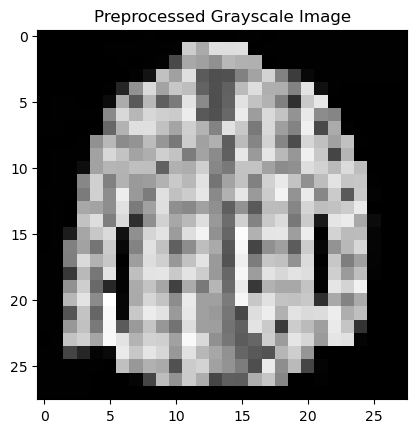

In [12]:
sample_image= r'C:\Users\HP\Desktop\images (2).jpeg'
x = preprocess_image(sample_image)
predictions = model.predict(x)
predicted_label = class_labels[np.argmax(predictions)]
print("predicted_label", predicted_label )